# RDDs
just for the intro, later DataFrames

In [2]:
# import required Spark class
from pyspark.sql import SparkSession

There are at least three ways to create a brand new RDD:
1. RDDs can be created from datafiles. You can use SparkContext.textFile() or
SparkSession.spark.read.text() to read datafiles from Amazon S3, HDFS, the
Linux filesystem, and many other data sources, as discussed in Chapter 1.
2. RDDs can be created from collections such as a list data structure (e.g., a list of
numbers, or a list of strings, or a list of pairs) using SparkContext.parallel
ize().
3. Given a source RDD, you can apply a transformation (such as filter() or
map()) to create a new RDD.

In [ ]:
> THIS IS A BLUEPRINT
# create an instance of SparkSession as spark
spark = SparkSession.builder \
.master("local") \
.appName("my-application-name") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
# to debug the SparkSession
print(spark.version)
# create a reference to SparkContext as sc
# SparkContext is used to create new RDDs
sc = spark.sparkContext

> our task

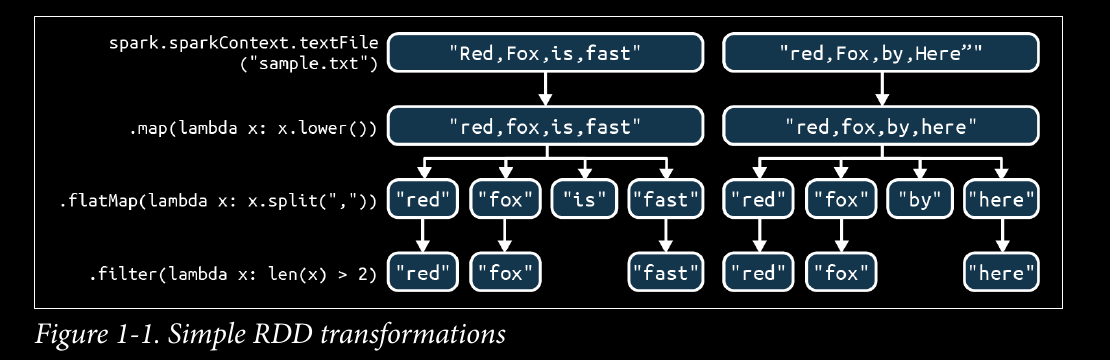

>**SparkSession** <br>
The SparkSession class, defined in the pyspark.sql package, is the entry point
to programming Spark with the Dataset and DataFrame APIs. In order to do
anything useful with a Spark cluster, you first need to create an instance of this
class, which gives you access to an instance of SparkContext.

In [3]:
from pyspark.sql import SparkSession
# Create an instance of SparkSession
spark = SparkSession.builder.getOrCreate()
#spark = SparkSession.builder.appName("ch01").getOrCreate()

24/05/16 13:12:05 WARN Utils: Your hostname, msi-MAG resolves to a loopback address: 127.0.1.1; using 192.168.0.129 instead (on interface wlp3s0)
24/05/16 13:12:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/16 13:12:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


>**SparkContext**<br>
The SparkContext class, is the main entry point for Spark functionality. 
A SparkContext holds a connection to the Spark cluster
manager and can be used to create RDDs and broadcast variables in the cluster. <br>
>  <mark>SparkSession > sparkContext</mark>

## Create RDD
> read the sample.txt file

In [2]:
records = spark.sparkContext.textFile("sample.txt")
records.collect() # RDD displaysa

> **Application Driver** <br>
> All Spark applications run as independent process (the task gets subdivided). These processes are coordinated by a SparkContext in a *driver program*, a driver program written with the **PySpark API** 
> **Worker**<br>
*worker = node* <br>
A worker is any node that can run programs in the cluster. 
<br>Two architectures
>* One (single node)
>* Master Slave (multi node)

> **Cluster manager** <br>
The “master” node is known as the cluster manager. It allocate the resources
> * YARN (hadoop)
> * Standalone (Spark’s own built-in clustered environment)

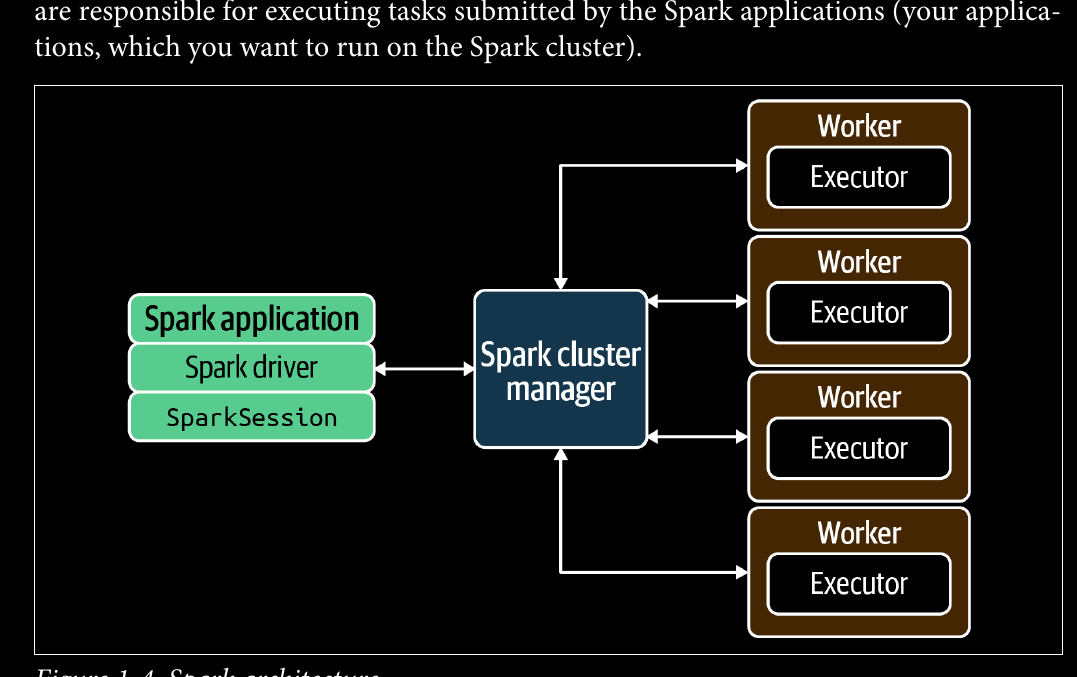

## Map()
map() transformation, which is a 1-to-1 transformation, 
we use it to transform WHOLE strings to lower case

In [5]:
records_lowercase = records.map(lambda x: x.lower())
records_lowercase.collect()

## flatMap()
> a flatMap() transformation, which is a 1-to-many transformation,
to convert each element (representing a single record) into a sequence of target
elements (each representing a word). 

In [7]:
words = records_lowercase.flatMap(lambda x: x.split(","))
words.collect()

['red', 'fox', 'is', 'fast', 'red', 'fox', 'by', 'here']

## Filter
>filter() transformation drops unwanted words, keeping only those with a
length greater than 2:

In [8]:
filtered = words.filter(lambda x: len(x) > 2)
filtered.collect

<bound method RDD.collect of PythonRDD[4] at RDD at PythonRDD.scala:53>

# Second Task

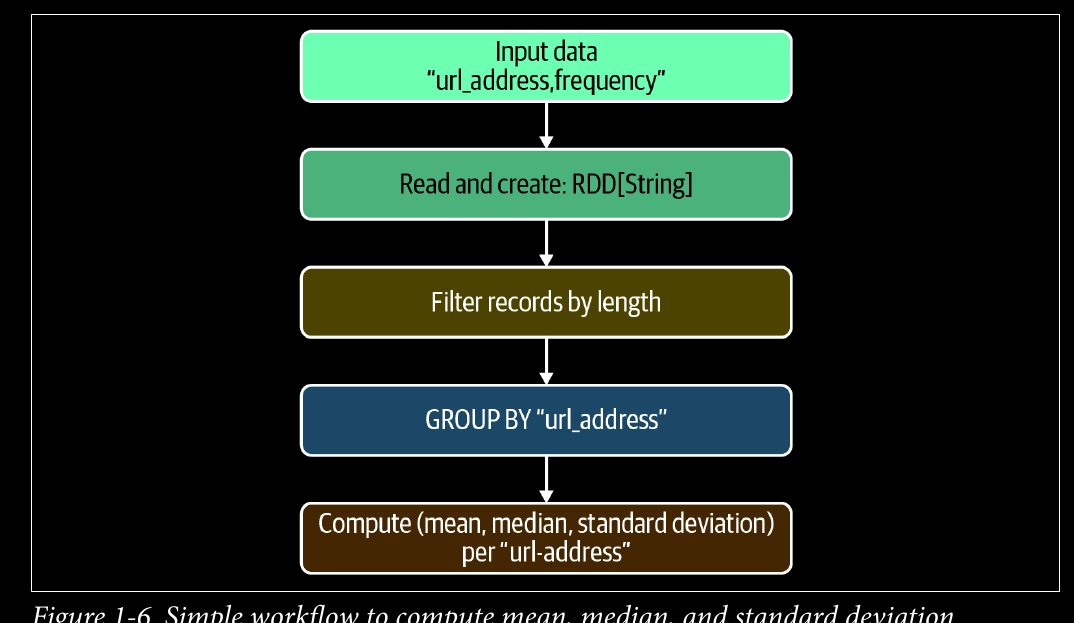

In [9]:
import statistics

In [4]:
# Create a pair of (url_address, frequency)
# where url_address is a key and frequency is a value
# record denotes a single element of RDD[String]
# record: <url_address><,><frequency>
def create_pair(record):
    tokens = record.split(',')
    url_address = tokens[0]
    frequency = tokens[1]
    return (url_address, frequency)
# Compute average, median, and standard
# deviation for a given set of numbers

# frequencies = [number1, number2, ...]
def compute_stats(frequencies):
    average = statistics.mean(frequencies)
    median = statistics.median(frequencies)
    standard_deviation = statistics.stdev(frequencies)
    return (average, median, standard_deviation)

In [5]:
input_path = "./data/myinput.txt"
results = spark \
.sparkContext \
.textFile(input_path) \
.filter(lambda record: len(record) > 5) \
.map(create_pair) \
.groupByKey() \
.mapValues(compute_stats)

* Read data as a distributed set of String records (creates an RDD[String]).
* Drop records with a length less than or equal to 5 (keep records with a length
greater than 5).
* Create (url_address, frequency) pairs from the input records.
* Group the data by keys—each key (a url_address) will be associated with a list
of frequencies.
* Apply the compute_stats() function to the list of frequencies.

In [6]:
spark.stop()